In [1]:
import pandas as pd

# Load the uploaded dataset
file_path = 'Churn_Modelling.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Data cleaning: Drop unnecessary columns and handle missing values
data_cleaned = data.drop(columns=["RowNumber", "CustomerId", "Surname"])
data_cleaned["HasCrCard"] = data_cleaned["HasCrCard"].fillna(data_cleaned["HasCrCard"].mode()[0])

# Encoding categorical features
label_encoders = {}
for col in ["Geography", "Gender"]:
    label_encoders[col] = LabelEncoder()
    data_cleaned[col] = label_encoders[col].fit_transform(data_cleaned[col])

# Splitting features and target
X = data_cleaned.drop(columns=["Exited"])
y = data_cleaned["Exited"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
# Handle missing values for numerical columns by filling with the column mean
data_cleaned = data_cleaned.fillna(data_cleaned.mean())

# Retry Random Forest Classifier training
# Ensure there are no mismatches in data types or dimensions
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

# Train the Random Forest model again
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)

accuracy, classification_report_result



(0.8657114295234921,
 '              precision    recall  f1-score   support\n\n           0       0.88      0.96      0.92      2401\n           1       0.76      0.48      0.59       600\n\n    accuracy                           0.87      3001\n   macro avg       0.82      0.72      0.75      3001\nweighted avg       0.86      0.87      0.85      3001\n')

Analyze feature importance in Random Forest.



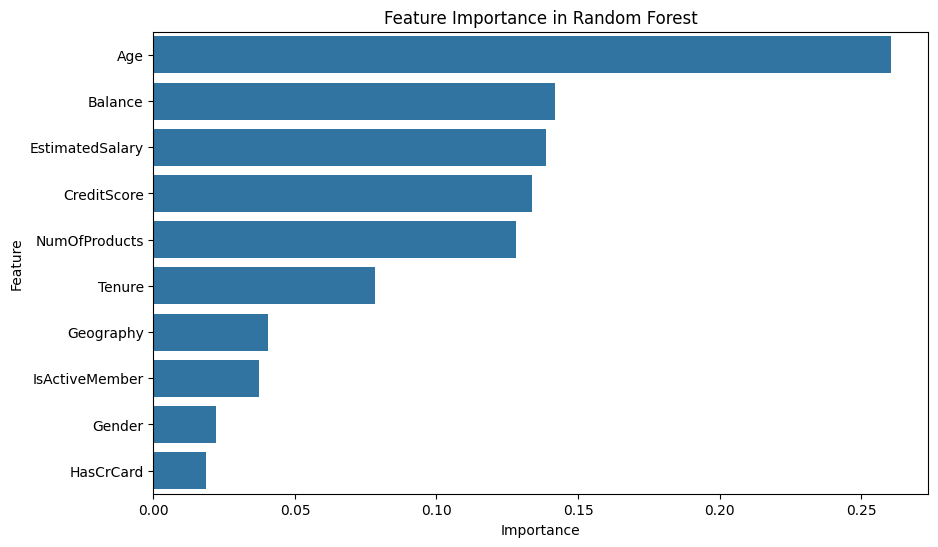

,Feature,Importance
3,Age,0.260724
5,Balance,0.141813
9,EstimatedSalary,0.138747
0,CreditScore,0.133766
6,NumOfProducts,0.128225


In [3]:
# Train a Random Forest model with class weights to handle class imbalance
rf_weighted = RandomForestClassifier(n_estimators=100, class_weight="balanced", random_state=42)
rf_weighted.fit(X_train, y_train)

# Predict and evaluate on the test set
y_pred_weighted = rf_weighted.predict(X_test)
accuracy_weighted = accuracy_score(y_test, y_pred_weighted)
classification_report_weighted = classification_report(y_test, y_pred_weighted)

accuracy_weighted, classification_report_weighted

# Get feature importances from the trained Random Forest model
feature_importances = rf_weighted.feature_importances_
feature_names = X_train.columns

# Create a DataFrame for feature importance
importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": feature_importances
}).sort_values(by="Importance", ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=importance_df)
plt.title("Feature Importance in Random Forest")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

# Display the top features
importance_df.head()


In [9]:
# Redefine the train-test split after handling missing values
X = data_cleaned.drop(columns=["Exited"])
y = data_cleaned["Exited"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight="balanced")
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

accuracy, classification_report_result


(0.8647117627457515,
 '              precision    recall  f1-score   support\n\n           0       0.88      0.97      0.92      2401\n           1       0.78      0.45      0.57       600\n\n    accuracy                           0.86      3001\n   macro avg       0.83      0.71      0.75      3001\nweighted avg       0.86      0.86      0.85      3001\n')

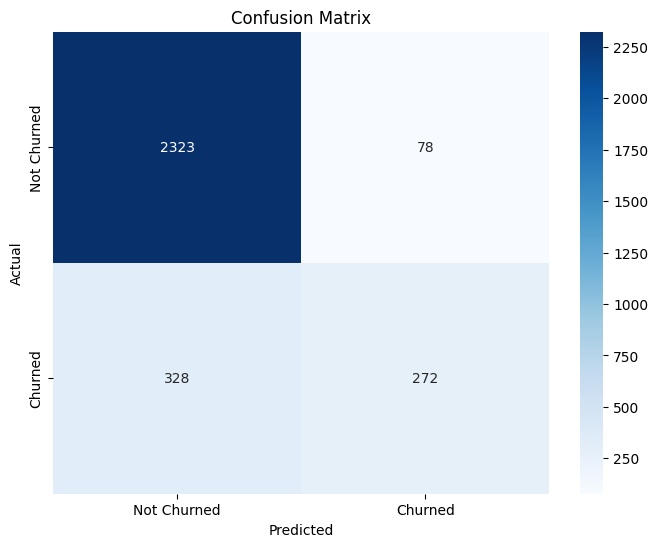

In [10]:
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Churned", "Churned"], yticklabels=["Not Churned", "Churned"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


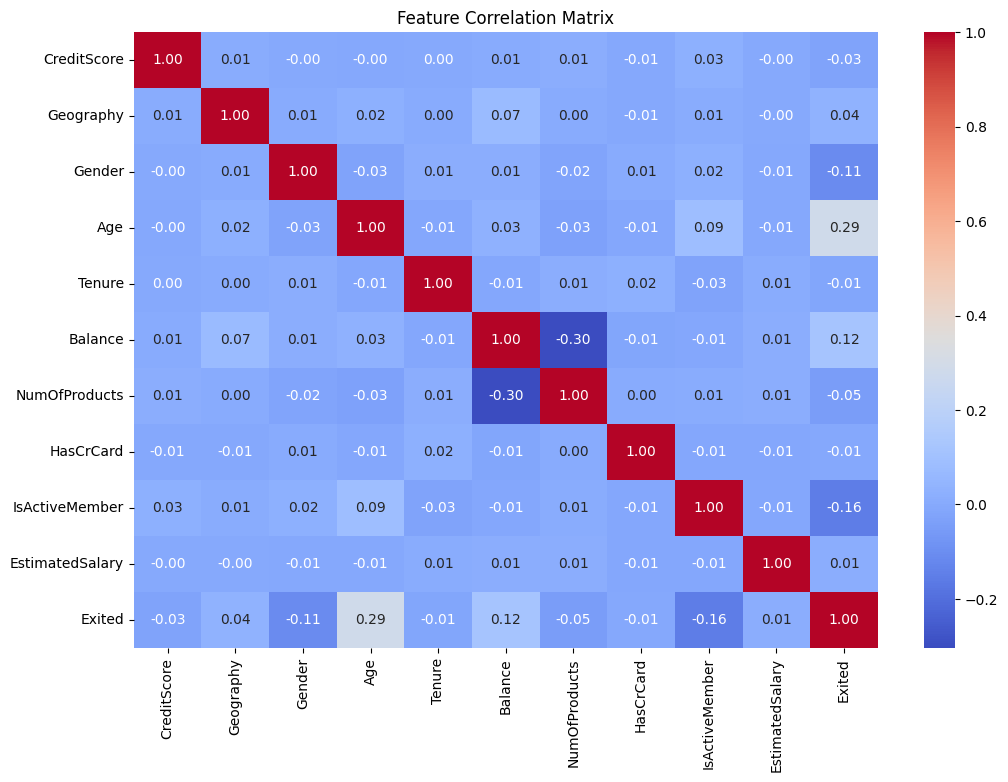

In [ ]:
# Calculate the correlation matrix
correlation_matrix = data_cleaned.corr()

# Plot the heatmap of correlations
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, xticklabels=correlation_matrix.columns, yticklabels=correlation_matrix.columns)
plt.title("Feature Correlation Matrix")
plt.show()
